## (a)

\begin{align*}
H_{ij} = \frac{\partial J}{\partial \theta_i \partial \theta_j} 
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial (g(z)  - 1)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} \frac {\partial g(z)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) \frac{\partial z}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) y^{(k)} x_j^{(k)} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) x_i^{(k)} x_j^{(k)} \\
\end{align*}

## (b)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [275]:
X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt',header=None,delim_whitespace=True,dtype=np.float32)
y = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt',header=None,delim_whitespace=True,dtype=np.int32)
print(X.shape, y.shape)

(99, 2) (99, 1)


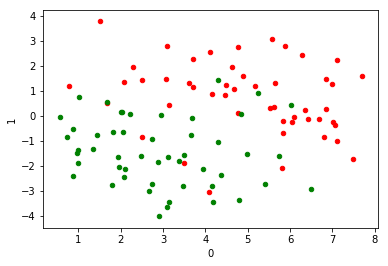

In [4]:
ax = plt.axes()
X.loc[y[0]==1].plot.scatter(0,1,c='red',ax=ax)
X.loc[y[0]==-1].plot.scatter(0,1,c='green',ax=ax)

In [261]:
X_train = X.values

In [262]:
# add intercept term placeholder
X_train = np.concatenate([X_train,np.ones((X_train.shape[0],1))],axis=1)

Newton's method addresses getting to $f(\theta) = 0$, and minimizing $J(\theta)$ means getting $\frac{\partial J}{\partial \theta}$ to 0. There after applying Newton's method, extending it to multidimensional setting (Newton-Raphson method), the update rule becomes:

\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}

Note, the $H$ in the denominator may not be a valid mathematical expression as it is actually an inverse operation.

In [263]:
y_train = y.values.reshape(-1)
y_train[y_train==-1] = 0 

In [264]:
tol = 1e9
threshold = 1e-6
n_samples, n_features = X_train.shape
print(n_samples, n_features)
# feature vector's size
theta = np.zeros(n_features)
theta_history = []
step_cnt = 0
while tol > threshold:
    # 计算Logistic regression
    z = X_train.dot(theta)
    g = 1. / (1 + np.exp(-z))
    error = g - y_train
    # 计算Loss的梯度
    loss_delta = np.dot(X_train.T, error)
    A =  g*(1-g)* np.eye(len(X_train))  
    
    hessian = np.array(np.mat(X_train.T)* A * np.mat(X_train))
    
    
    delta = np.linalg.inv(hessian).dot(loss_delta)
    old_theta = theta.copy()
    theta -= delta
    
    theta_history.append(theta.copy())
    step_cnt += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(step_cnt))

99 3
converged after 7 iterations


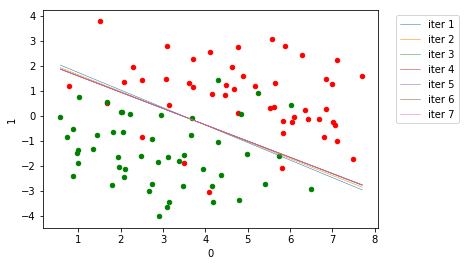

In [265]:
ax = plt.axes()
X.loc[y_train==1].plot.scatter(0,1,c='red',ax=ax)
X.loc[y_train==0].plot.scatter(0,1,c='green',ax=ax)

_xs = np.array([np.min(X_train[:,0]), np.max(X_train[:,0])])
for k, theta in enumerate(theta_history):
    _ys = (theta[2] + theta[0] * _xs) / (- theta[1])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [279]:
tol = 1e9
threshold = 1e-6
n_samples, n_features = X_train.shape
print(n_samples, n_features)
# feature vector's size
theta = np.zeros(n_features)
theta_history = []
step_cnt = 0
while tol > threshold:
    # 计算Logistic regression
    z = y_train*X_train.dot(theta)
    g = 1. / (1 + np.exp(-z))
    error = (g - 1)*y_train
    # 计算Loss的梯度
    loss_delta = np.dot(X_train.T, error)
    A =  g*(1-g)* np.eye(len(X_train))  
    
    hessian = np.array(np.mat(X_train.T)* A * np.mat(X_train))
    
    
    delta = np.linalg.inv(hessian).dot(loss_delta)
    old_theta = theta.copy()
    theta -= delta
    
    theta_history.append(theta.copy())
    step_cnt += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(step_cnt))

99 3
converged after 7 iterations


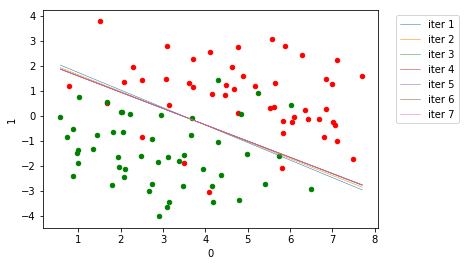

In [280]:
ax = plt.axes()
X.loc[y_train==1].plot.scatter(0,1,c='red',ax=ax)
X.loc[y_train==-1].plot.scatter(0,1,c='green',ax=ax)

_xs = np.array([np.min(X_train[:,0]), np.max(X_train[:,0])])
for k, theta in enumerate(theta_history):
    _ys = (theta[2] + theta[0] * _xs) / (- theta[1])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")